# 此文件对低预算电影进行数据分析

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
import math
from wordcloud import WordCloud
from scipy import stats
from collections import Counter
from math import isnan
%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [2]:
#载入训练数据
ftrain_data="low_train.csv"
# ftrain_data="train.csv"
train_data = pd.read_csv(ftrain_data, index_col=False, low_memory=False)
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,...,2/5/09,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.95,...,1/15/04,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
2,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.90,...,2/16/96,100.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
3,12,"[{'id': 48190, 'name': 'Revenge of the Nerds C...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0093857,en,Revenge of the Nerds II: Nerds in Paradise,The members of the Lambda Lambda Lambda frater...,10.54,...,7/10/87,98.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
4,16,NaN,500000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://skinningmovie.com/synopsis.htm,tt1129437,sr,Šišanje,Novica is a mathematics champion in a Belgrade...,1.02,...,10/6/10,97.00,"[{'iso_639_1': 'sr', 'name': 'Srpski'}]",Released,Life is sometimes rude game: one mistake can b...,Skinning,"[{'id': 379, 'name': 'skinhead'}, {'id': 7492,...","[{'cast_id': 1001, 'character': 'Novica', 'cre...","[{'credit_id': '52fe4927c3a36847f818bb5f', 'de...",198


In [3]:
# 查看数据维度信息
train_data.shape

(805, 23)

In [4]:
# 查看数据信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     805 non-null    int64  
 1   belongs_to_collection  108 non-null    object 
 2   budget                 805 non-null    int64  
 3   genres                 802 non-null    object 
 4   homepage               173 non-null    object 
 5   imdb_id                805 non-null    object 
 6   original_language      805 non-null    object 
 7   original_title         805 non-null    object 
 8   overview               802 non-null    object 
 9   popularity             805 non-null    float64
 10  poster_path            804 non-null    object 
 11  production_companies   711 non-null    object 
 12  production_countries   770 non-null    object 
 13  release_date           805 non-null    object 
 14  runtime                804 non-null    float64
 15  spoken

In [5]:
# 数据集含义
# 列名--------------------含义
# id                        标识号
# belongs_to_collection     属于某一类收藏
# budget                    预算（美元）
# genres                    风格列表
# homepage                  电影首页的 URL
# imdb_id                   IMDB 标识号
# original_language         原始语言
# original_title            原始电影名称
# overview                  剧情摘要
# popularity                受欢迎程度
# poster_path               海报url路径
# production_companies      制作电影公司
# production_countries      制作国家
# release_date              首次上映日期
# runtime                   电影时长
# spoken_languages          输出语言
# status                    电影状态（已发行等）
# tagline                   电影的标语
# title                     电影名称
# Keywords                  与电影相关的关键字
# cast                      演员列表
# crew                      剧组
# revenue                   收入（美元）

In [6]:
# 查看数据特殊值情况
train_data.nunique()

id                       805
belongs_to_collection     94
budget                    85
genres                   295
homepage                 173
imdb_id                  805
original_language         29
original_title           804
overview                 802
popularity               804
poster_path              804
production_companies     623
production_countries     125
release_date             755
runtime                   96
spoken_languages         135
status                     2
tagline                  520
title                    803
Keywords                 644
cast                     797
crew                     802
revenue                  767
dtype: int64

In [7]:
# 查看数据缺失值情况
train_data.isnull().sum()

id                         0
belongs_to_collection    697
budget                     0
genres                     3
homepage                 632
imdb_id                    0
original_language          0
original_title             0
overview                   3
popularity                 0
poster_path                1
production_companies      94
production_countries      35
release_date               0
runtime                    1
spoken_languages          14
status                     0
tagline                  285
title                      0
Keywords                 135
cast                       1
crew                       3
revenue                    0
dtype: int64

In [8]:
# 查看数据均值等情况
train_data.describe()

,id,budget,popularity,runtime,revenue
count,805.00,805.00,805.00,804.00,805.00
mean,1232.23,60494.19,4.97,102.04,11404449.33
std,714.77,184434.62,4.06,20.06,27031283.03
min,5.00,0.00,0.00,0.00,1.00
25%,622.00,0.00,1.53,90.00,204660.00
50%,1215.00,0.00,4.35,99.00,1751330.00
75%,1843.00,0.00,7.75,111.00,10000000.00
max,2497.00,967686.00,37.48,193.00,253625427.00


## 探索式数据挖掘 

**首先探索数值属性对票房的影响**  
**(1) budget**

In [9]:
train_data['revenue'].isnull().sum()

0

In [10]:
train_data['budget'].isnull().sum()

0

<AxesSubplot:xlabel='budget', ylabel='revenue'>

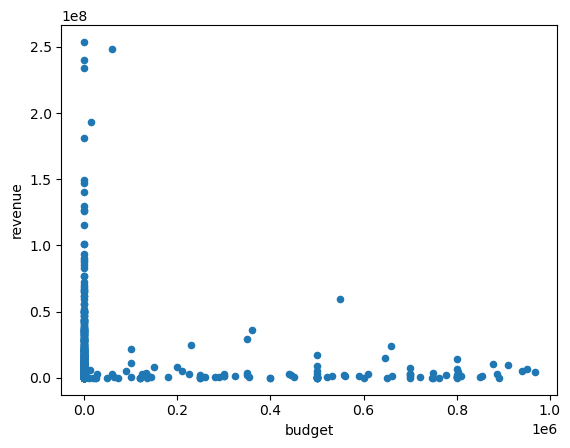

In [11]:
""" 
可视化 budget 与 revenue 之间的散点图
"""
train_data.plot.scatter('budget','revenue')

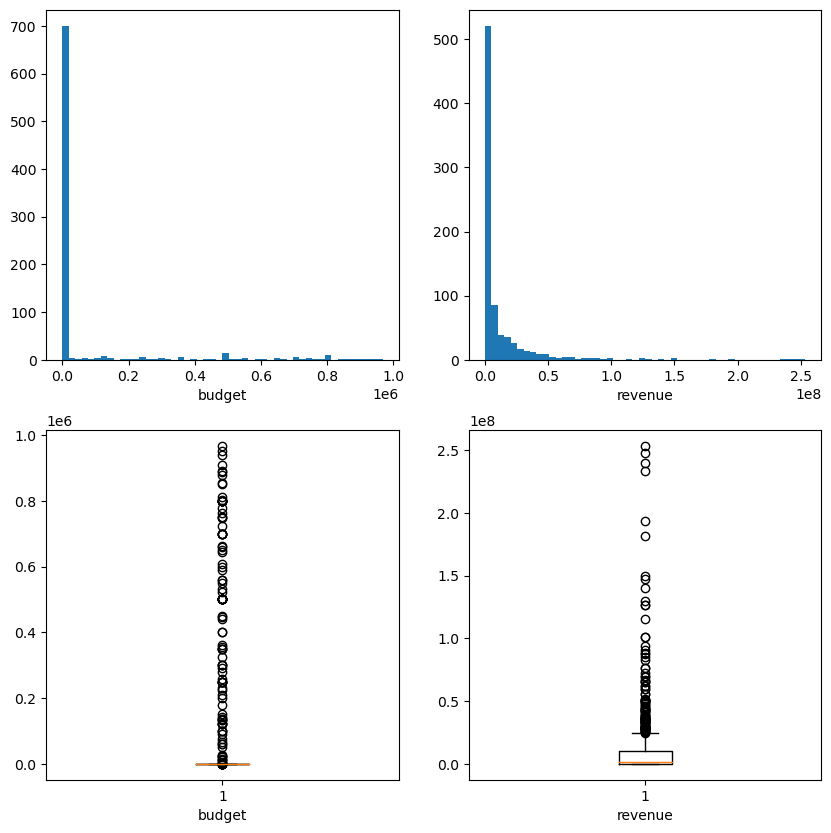

In [12]:
"""
可视化budget和revenue的数据特征
"""

attri1 = "budget"
attri2 = "revenue"

# coding=utf-8
plt.figure(figsize = (10,10))

# budget直方图
plt.subplot(2,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# revenue直方图
plt.subplot(2,2,2)
title = attri2
plt.xlabel(title)
plt.hist(train_data[attri2],bins = 50)

# budget盒图
plt.subplot(2,2,3)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])

# revenue盒图
plt.subplot(2,2,4)
title = attri2
plt.xlabel(title)
plt.boxplot(train_data[attri2])


plt.show()

**这两个属性存在严重的数据分布不均匀现象（低值数据多，高值数据少）**  
**尝试用log将其均匀化**  

In [13]:
# 尝试对 budget 和 revenue 做log变换
train_data['log_budget'] = np.log1p(train_data['budget'])
train_data['log_revenue'] = np.log1p(train_data['revenue'])

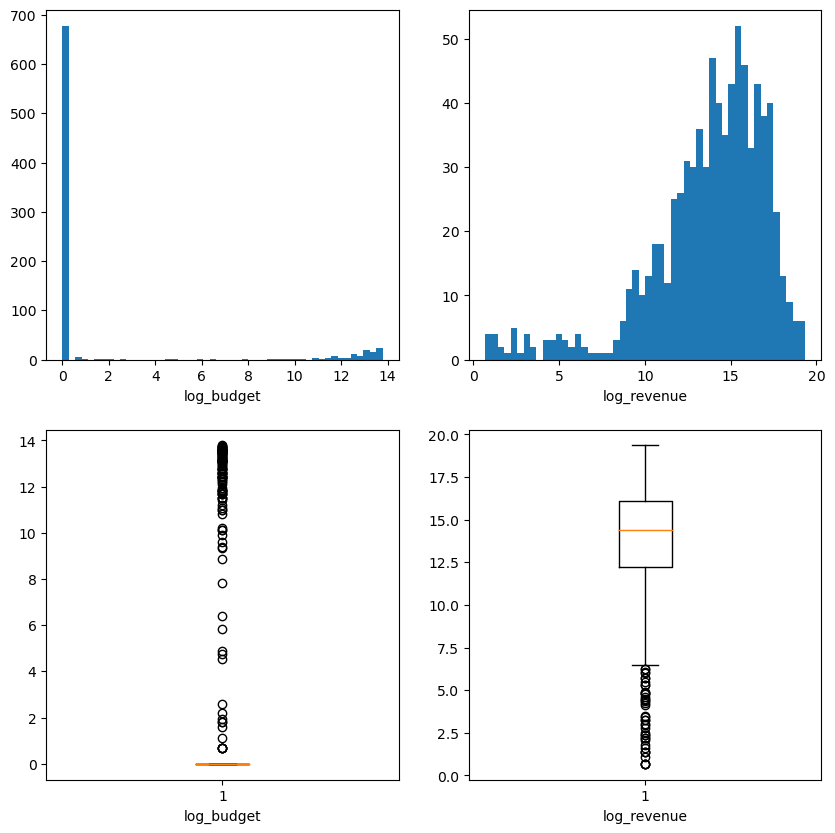

In [14]:
"""
可视化 log_budget 和 log_revenue 的数据特征
"""

attri1 = "log_budget"
attri2 = "log_revenue"

# coding=utf-8
plt.figure(figsize = (10,10))

# budget直方图
plt.subplot(2,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# revenue直方图
plt.subplot(2,2,2)
title = attri2
plt.xlabel(title)
plt.hist(train_data[attri2],bins = 50)

# budget盒图
plt.subplot(2,2,3)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])

# revenue盒图
plt.subplot(2,2,4)
title = attri2
plt.xlabel(title)
plt.boxplot(train_data[attri2])


plt.show()

<AxesSubplot:xlabel='log_budget', ylabel='log_revenue'>

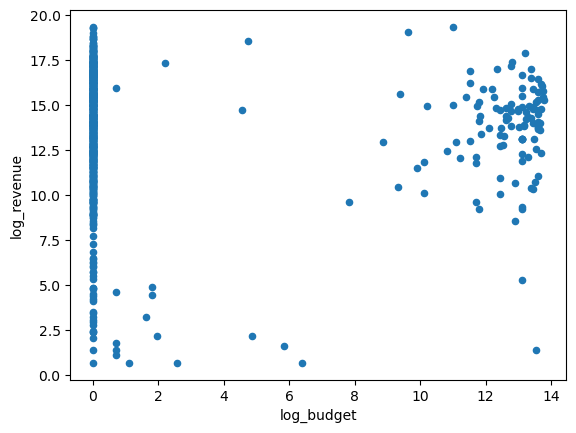

In [15]:
"""
可视化 log_budget 与 log_revenue 之间的散点图
"""
train_data.plot.scatter('log_budget','log_revenue')

**可以看出预算较低时，票房收入与预算没有明显关系**  

**(2) popularity**

In [16]:
train_data['popularity'].isnull().sum()

0

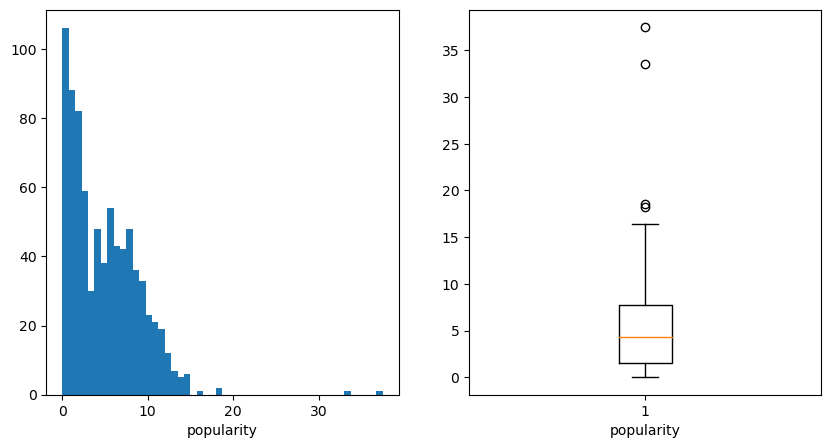

In [17]:
"""
可视化 popularity 数据特征
"""

attri1 = "popularity"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

In [18]:
# 尝试对 popularity 做log变换
train_data['log_popularity'] = np.log1p(train_data['popularity'])

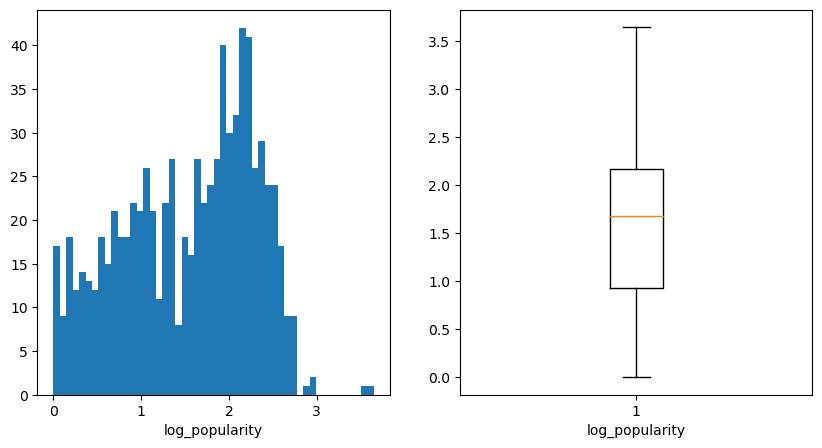

In [19]:
"""
可视化 log_popularity 数据特征
"""

attri1 = "log_popularity"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

<AxesSubplot:xlabel='log_popularity', ylabel='log_revenue'>

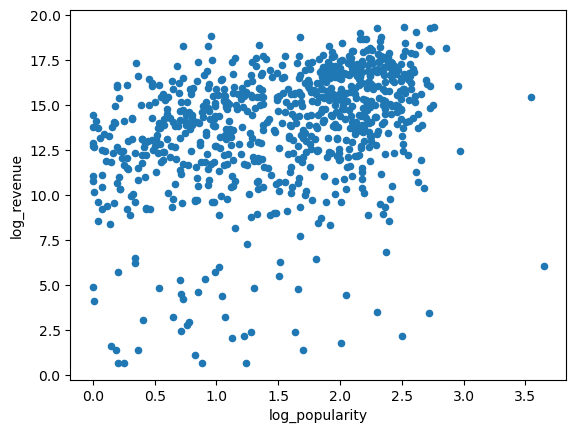

In [20]:
"""
可视化 log_popularity 与 log_revenue 之间的散点图
"""
train_data.plot.scatter('log_popularity','log_revenue')

**由上述散点图可知： log_revenue 与 log_popularity 有着一定的相关关系**  

**(3) runtime**

In [21]:
train_data['runtime'].isnull().sum()

1

In [22]:
train_data[train_data['runtime'] == 0].shape

(5, 26)

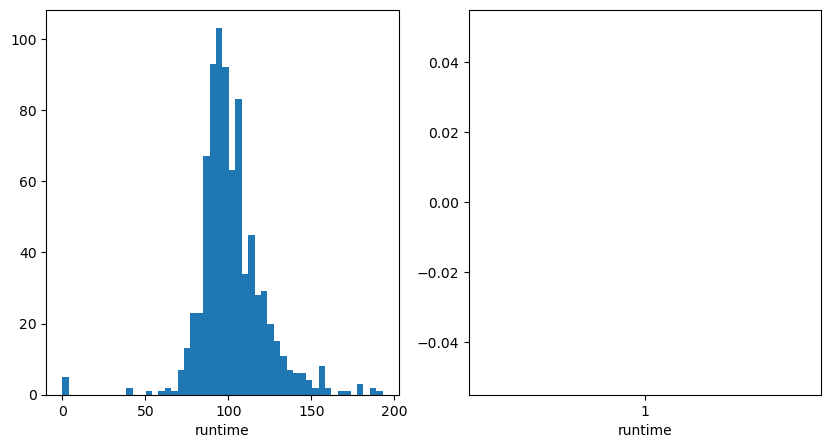

In [23]:
"""
可视化 runtime 数据特征
"""

attri1 = "runtime"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

**电影时长大体遵循正态分布**  
**可以尝试用均值填补缺失值和零值**  

In [24]:
train_data['runtime'] = train_data['runtime'].fillna(train_data['runtime'].mean())
train_data['runtime'].isnull().sum()

0

In [25]:
train_data['runtime'] = train_data['runtime'].replace(0, train_data['runtime'].mean())
train_data[train_data['runtime'] == 0].shape

(0, 26)

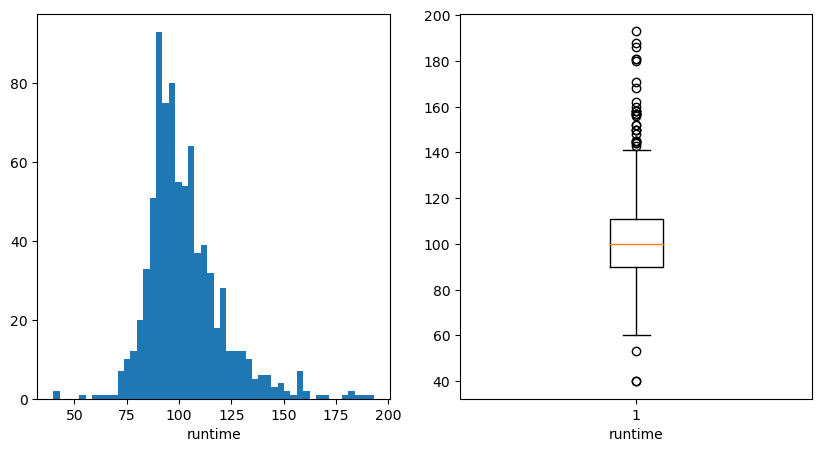

In [26]:
"""
可视化 runtime 数据特征
"""

attri1 = "runtime"

# coding=utf-8
plt.figure(figsize = (10,5))

# 直方图
plt.subplot(1,2,1)
title = attri1
plt.xlabel(title)
plt.hist(train_data[attri1],bins = 50)

# 盒图
plt.subplot(1,2,2)
title = attri1
plt.xlabel(title)
plt.boxplot(train_data[attri1])


plt.show()

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

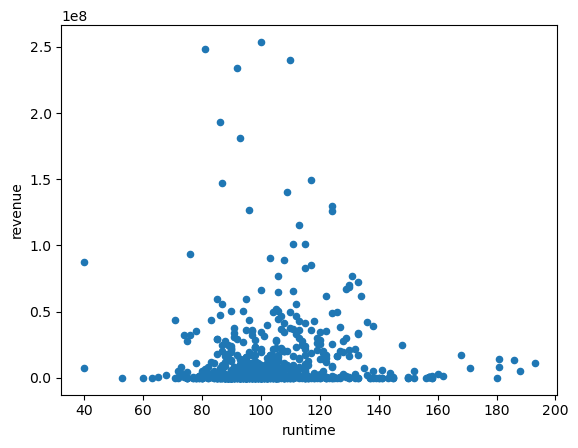

In [27]:
"""
可视化 runtime 与 revenue 之间的散点图
"""
train_data.plot.scatter('runtime','revenue')

**(4) homepage, poster_path**  
  
  

In [28]:
train_data['homepage'].isnull().sum()

632

In [29]:
train_data['poster_path'].isnull().sum()

1

**poster_path训练集个别缺失，该属性的有无对分析作用不大。故将其删除**  

In [30]:
train_data.drop(['poster_path'], axis=1, inplace=True)

**homepage大部分缺失，分析有无homepage对票房收入的影响**  

In [31]:
"""
构建二值属性
"""
train_data['has_homepage'] = 0
train_data.loc[train_data['homepage'].isnull() == False, 'has_homepage'] = 1

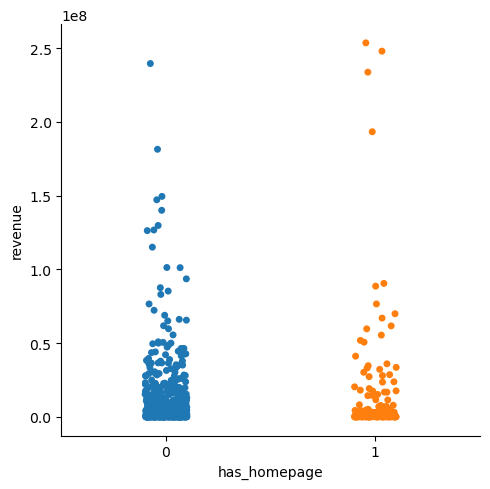

In [32]:
"""
可视化 has_homepage 与 revenue 之间的散点图
"""
sns.catplot(x='has_homepage',y='revenue',data=train_data)

In [33]:
has_homepage = train_data[train_data['has_homepage'] == 1]
has_homepage['revenue'].describe()

count         173.00
mean     13606948.14
std      38022839.30
min             1.00
25%         99303.00
50%       1056938.00
75%       6861102.00
max     253625427.00
Name: revenue, dtype: float64

In [34]:
no_homepage = train_data[train_data['has_homepage'] == 0]
no_homepage['revenue'].describe()

count         632.00
mean     10801550.13
std      23135355.14
min             1.00
25%        247044.00
50%       1935795.50
75%      10908580.25
max     239606210.00
Name: revenue, dtype: float64

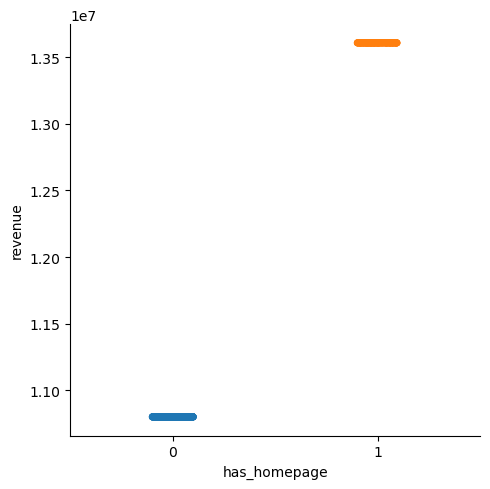

In [35]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_homepage"] == i]
    mean.append(data['revenue'].mean())
#     mean.append(data['revenue'].median())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_homepage"] == i,'revenue'] = mean[i]
sns.catplot(x='has_homepage',y='revenue',data=data)

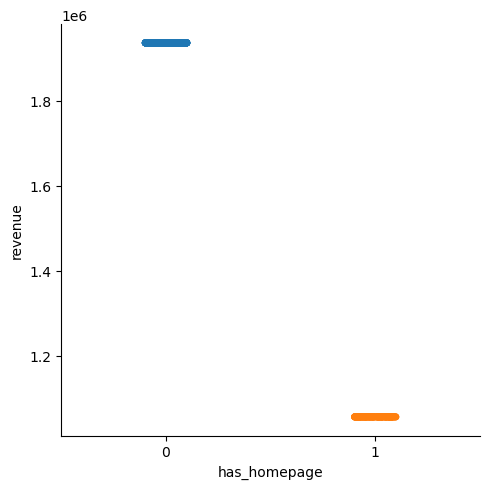

In [36]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_homepage"] == i]
#     mean.append(data['revenue'].mean())
    mean.append(data['revenue'].median())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_homepage"] == i,'revenue'] = mean[i]
sns.catplot(x='has_homepage',y='revenue',data=data)

In [37]:
#homepage作为无效属性，删除该属性
train_data.drop(['homepage'], axis=1, inplace=True)
train_data.head(2)

,id,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,...,tagline,title,Keywords,cast,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,NaN,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.95,NaN,...,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0


**从散点图和数据特征来看，在低预算电影中，有无电影首页URL的电影票房差别不大**  

**(5) imdb_id, original_title, title, overview**  

**imdb_id, original_title, title 等属性对分析无意义，删除该属性**  

In [38]:
train_data.drop(['imdb_id'], axis=1, inplace=True)
train_data.drop(['original_title'], axis=1, inplace=True)
train_data.drop(['title'], axis=1, inplace=True)

In [39]:
"""
查看 overview 属性缺失情况
"""
train_data['overview'].isnull().sum()

3

**极少量缺失，对数据分析没有意义，删除该属性**

In [40]:
train_data.drop(['overview'], axis=1, inplace=True)
train_data.head(2)

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,...,status,tagline,Keywords,cast,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.00,...,Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.95,NaN,NaN,1/15/04,84.00,...,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0


**(6) release_date**  

In [41]:
train_data['release_date'].isnull().sum()

0

In [42]:
"""
将数据集中的发行日期分解为年、月、日（星期）等属性
"""
train_data['release_date'] = pd.to_datetime(train_data['release_date'], format='%m/%d/%y')
train_data["release_year"] = pd.to_datetime(train_data["release_date"]).dt.year.astype(int)
train_data["release_day"] = pd.to_datetime(train_data["release_date"]).dt.dayofweek.astype(int)
train_data["release_month"] = pd.to_datetime(train_data["release_date"]).dt.month.astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     805 non-null    int64         
 1   belongs_to_collection  108 non-null    object        
 2   budget                 805 non-null    int64         
 3   genres                 802 non-null    object        
 4   original_language      805 non-null    object        
 5   popularity             805 non-null    float64       
 6   production_companies   711 non-null    object        
 7   production_countries   770 non-null    object        
 8   release_date           805 non-null    datetime64[ns]
 9   runtime                805 non-null    float64       
 10  spoken_languages       791 non-null    object        
 11  status                 805 non-null    object        
 12  tagline                520 non-null    object        
 13  Keywo

**由于数据集是2019年收集的，年份不应晚于2019**  

In [43]:
train_data['release_year'].max()

2068

In [44]:
def fix_year(x):
    if x > 2019:
        return x - 100
    else:
        return x 

train_data['release_year'] = train_data['release_year'].apply(lambda x: fix_year(x))

In [45]:
train_data['release_year'].max()

2017

In [46]:
train_data.head(2)

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,...,cast,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0,2009,3,2
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.95,NaN,NaN,2004-01-15,84.00,...,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0,2004,3,1


**day**  

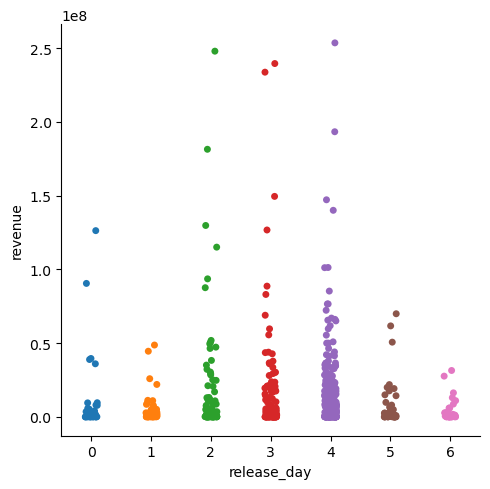

In [47]:
"""
可视化 release_day 与 revenue 之间的散点图
"""
sns.catplot(x='release_day',y='revenue',data=train_data)

<AxesSubplot:>

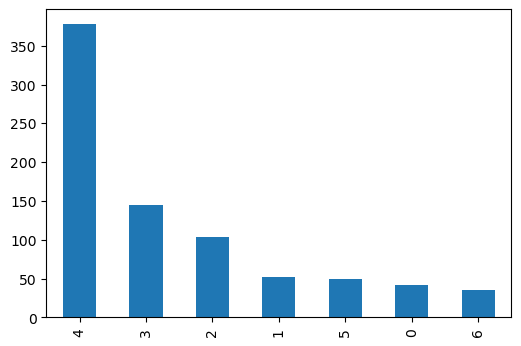

In [48]:
"""
可视化 release_day 的频数变化
"""
train_data["release_day"].value_counts().plot(kind="bar",figsize=(6,4))

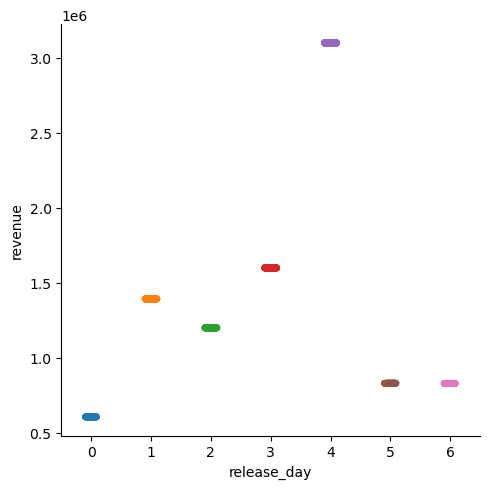

In [49]:
"""
可视化票房收入中值
"""
mean = [0,1,2,3,4,5,6]
for i in range(0,7):
    data =  train_data[train_data["release_day"] == i]
#     mean[i] = data['revenue'].mean()
    mean[i] = data['revenue'].median()
    
data = train_data.copy(deep = True)
for i in range(0,7):
    data.loc[data["release_day"] == i,'revenue'] = mean[i]
sns.catplot(x='release_day',y='revenue',data=data)

**通过可视化可以看出周五票房收入最高，周一、六、日三天票房相比于其余四天来说较为惨淡**  
**与高预算电影结合分析可以发现两者票房收入日期是刚好错开的**  

**month**  

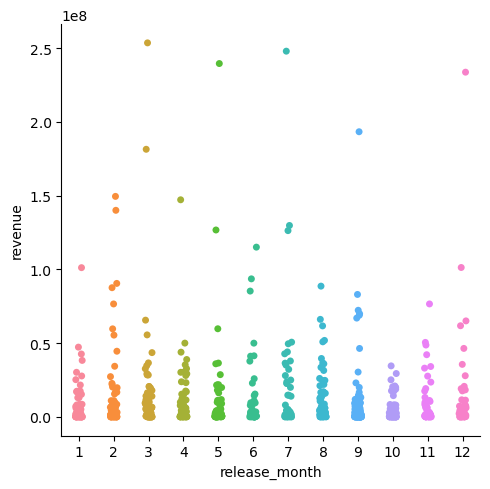

In [50]:
"""
可视化 release_month 与 revenue 之间的散点图
"""
sns.catplot(x='release_month',y='revenue',data=train_data)

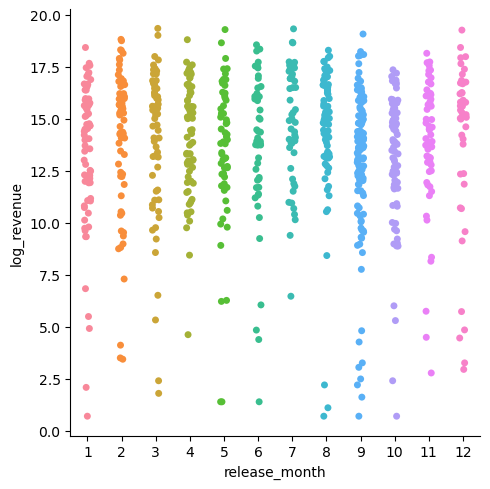

In [51]:
"""
可视化 release_month 与 log_revenue 之间的散点图
"""
sns.catplot(x='release_month',y='log_revenue',data=train_data)

<AxesSubplot:>

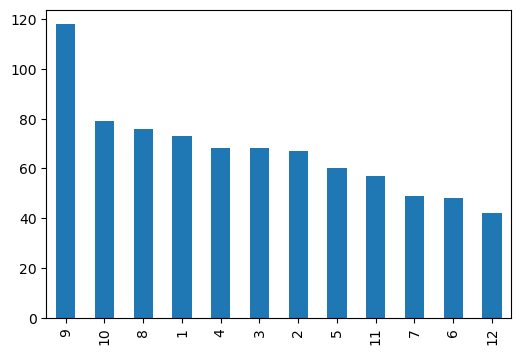

In [52]:
"""
可视化 release_month 的频数变化
"""
train_data["release_month"].value_counts().plot(kind="bar",figsize=(6,4))

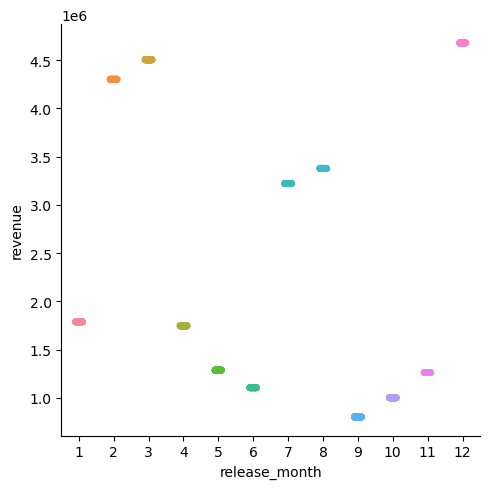

In [53]:
"""
可视化票房收入中值
"""
mean = [0]
for i in range(1,13):
    data =  train_data[train_data["release_month"] == i]
#     mean.append(data['revenue'].mean())
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(1,13):
    data.loc[data["release_month"] == i,'revenue'] = mean[i]
sns.catplot(x='release_month',y='revenue',data=data)

**通过可视化可以看出低成本电影在2，3，7，8，12等月份票房收入较高，5，6，9，10，11等月份票房收入相对低迷**  

**year**  

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

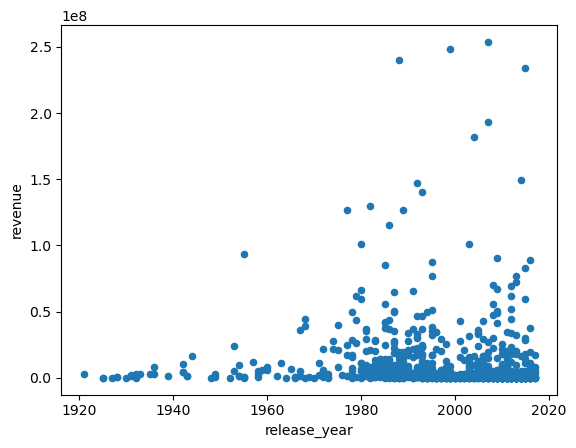

In [54]:
"""
可视化 release_year 与 revenue 之间的散点图
"""
train_data.plot.scatter('release_year','revenue')

(array([  7.,  10.,   9.,  15.,  15.,  28., 116., 147., 158., 300.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <BarContainer object of 10 artists>)

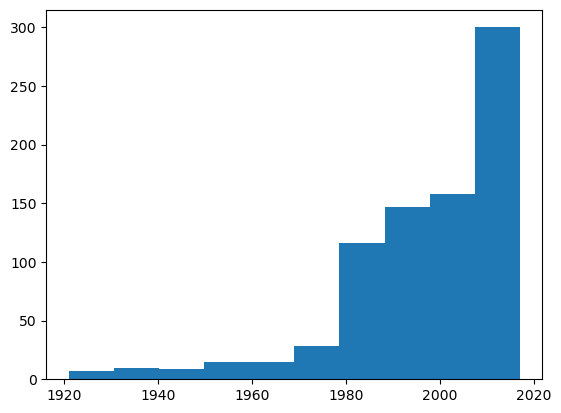

In [55]:
"""
可视化 release_year 的频数变化
"""
plt.hist('release_year',data=train_data)

In [56]:
#删除原有属性
train_data.drop(['release_date'], axis=1, inplace=True)
train_data.head(2)

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,...,cast,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0,2009,3,2
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",...,"[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0,2004,3,1


**(7) original_language**  

In [57]:
train_data['original_language'].isnull().sum()

0

In [58]:
for i,e in enumerate(train_data['original_language'][:5]):
    print(i,e)

0 ko
1 en
2 en
3 en
4 sr


In [59]:
train_data["original_language"].value_counts()

en    624
fr     36
es     23
ru     19
ja     18
cn     10
ko     10
it      9
ta      7
de      6
hi      6
zh      5
nl      5
da      3
tr      3
fa      3
sv      3
pt      3
no      2
ml      1
te      1
hu      1
ro      1
cs      1
ar      1
ur      1
el      1
sr      1
bn      1
Name: original_language, dtype: int64

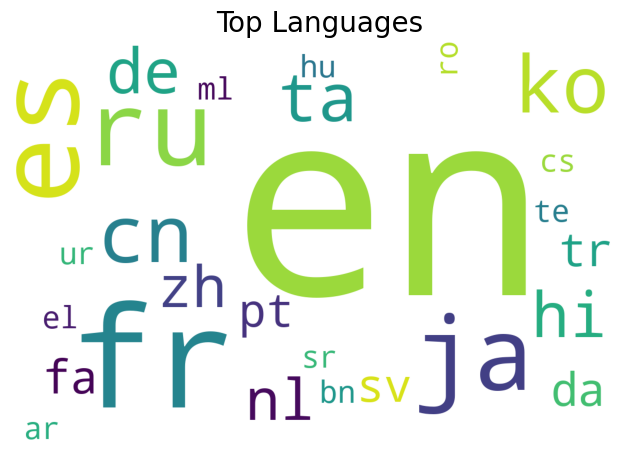

In [60]:
plt.figure(figsize = (8, 6))
text = ' '.join(train_data['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Languages', fontsize=20)
plt.axis("off")
plt.show()

In [61]:
"""
加入 is_en 属性表示原始语言是否为'en'
"""
train_data['is_en'] = 0
train_data.loc[train_data['original_language'] == 'en', 'is_en'] = 1
train_data.head(2)

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,...,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0,2009,3,2,0
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",...,"[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0,2004,3,1,1


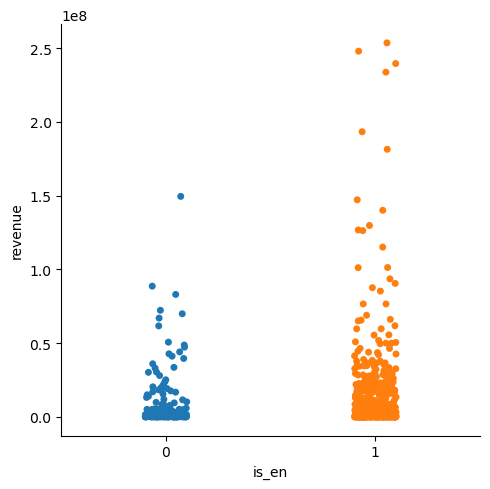

In [62]:
"""
可视化 is_en 与 revenue 之间的散点图
"""
sns.catplot(x='is_en',y='revenue',data=train_data)

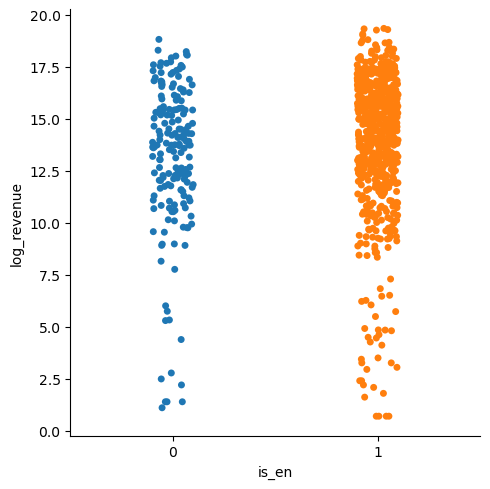

In [63]:
"""
可视化 is_en 与 log_revenue 之间的散点图
"""
sns.catplot(x='is_en',y='log_revenue',data=train_data)

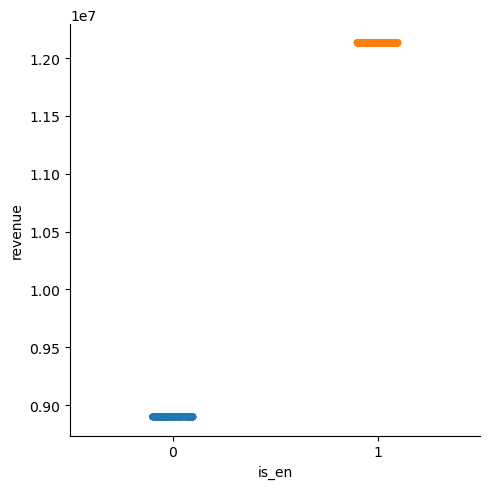

In [64]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["is_en"] == i]
    mean.append(data['revenue'].mean())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["is_en"] == i,'revenue'] = mean[i]
sns.catplot(x='is_en',y='revenue',data=data)

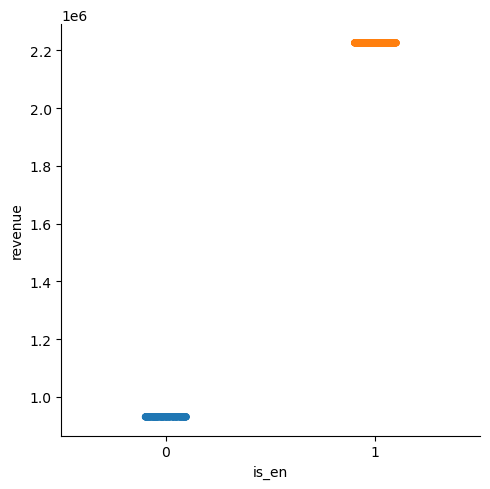

In [65]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["is_en"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["is_en"] == i,'revenue'] = mean[i]
sns.catplot(x='is_en',y='revenue',data=data)

In [66]:
train_data.drop(['original_language'], axis=1, inplace=True)
train_data.head(2)

,id,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,status,...,crew,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0.00,15.18,0.76,0,2009,3,2,0
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,...,"[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,0.00,14.77,1.08,0,2004,3,1,1


**通过可视化可以看出，原始语言是否为‘en’对票房收入有一定的影响**  

**(8) belongs_to_collection**  

In [67]:
train_data['belongs_to_collection'].isnull().sum()

697

In [68]:
train_data['collection'] = 0
train_data.loc[train_data['belongs_to_collection'].isnull() == False, 'collection'] = 1
train_data.head(2)

,id,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,status,...,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection
0,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,3923970,0.00,15.18,0.76,0,2009,3,2,0,0
1,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,...,2586511,0.00,14.77,1.08,0,2004,3,1,1,0


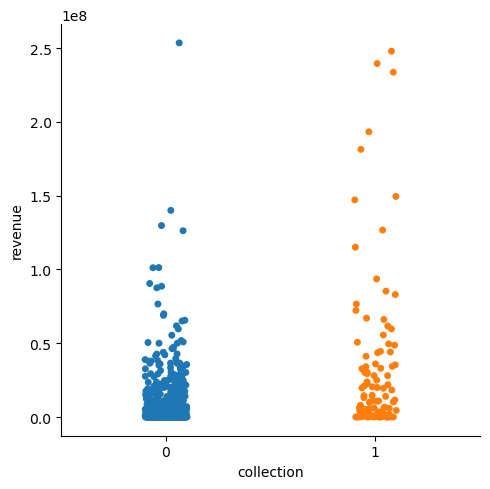

In [69]:
"""
可视化 collection 与 revenue 之间的散点图
"""
sns.catplot(x='collection',y='revenue',data=train_data)

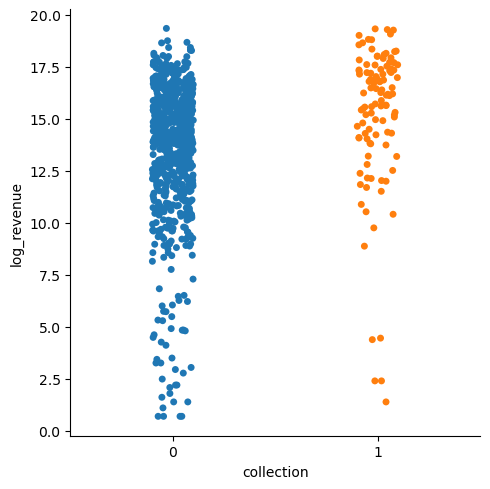

In [70]:
"""
可视化 collection 与 log_revenue 之间的散点图
"""
sns.catplot(x='collection',y='log_revenue',data=train_data)

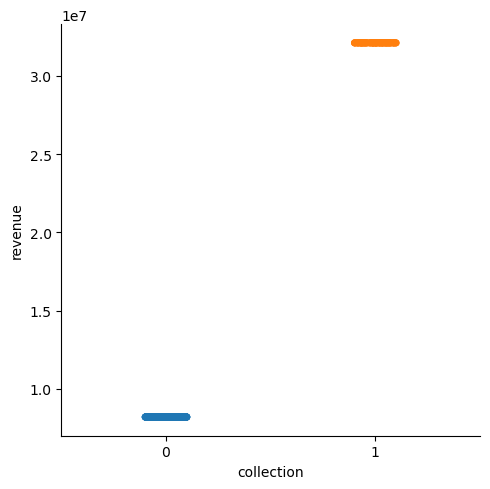

In [71]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["collection"] == i]
    mean.append(data['revenue'].mean())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["collection"] == i,'revenue'] = mean[i]
sns.catplot(x='collection',y='revenue',data=data)

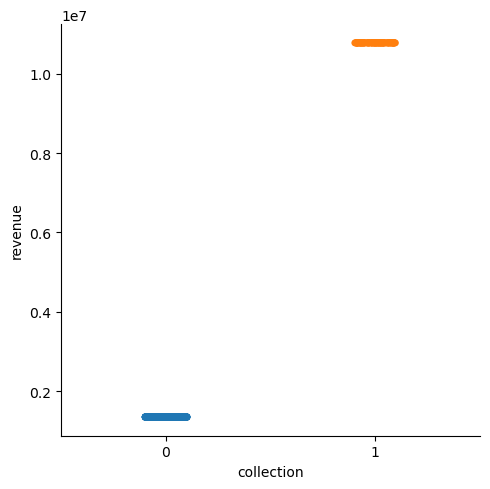

In [72]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["collection"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["collection"] == i,'revenue'] = mean[i]
sns.catplot(x='collection',y='revenue',data=data)

In [73]:
train_data.drop(['belongs_to_collection'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,status,tagline,...,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,...,3923970,0.00,15.18,0.76,0,2009,3,2,0,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,...,2586511,0.00,14.77,1.08,0,2004,3,1,1,0


**通过可视化可以看出，低成本电影大部分未被收藏。被收藏的电影票房收入远高于未被收藏的电影**  

**(9) production_countries**  

In [74]:
train_data['production_countries'].isnull().sum()

35

In [75]:
count=[]
for i in train_data['production_countries']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_prod_countries'] = count
train_data.head(2)

,id,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,status,tagline,...,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,...,0.00,15.18,0.76,0,2009,3,2,0,0,1
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,...,0.00,14.77,1.08,0,2004,3,1,1,0,0


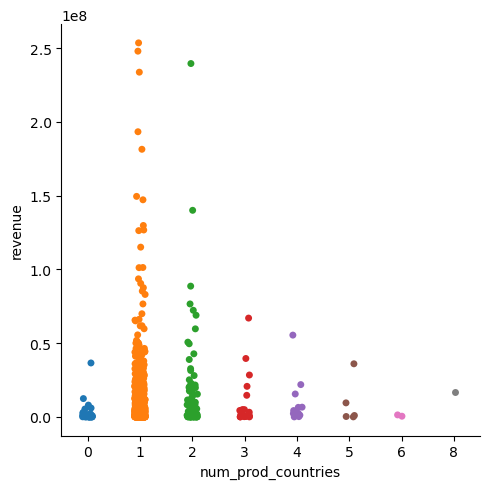

In [76]:
"""
可视化 num_prod_countries 与 revenue 之间的散点图
"""
sns.catplot(x='num_prod_countries',y='revenue',data=train_data)

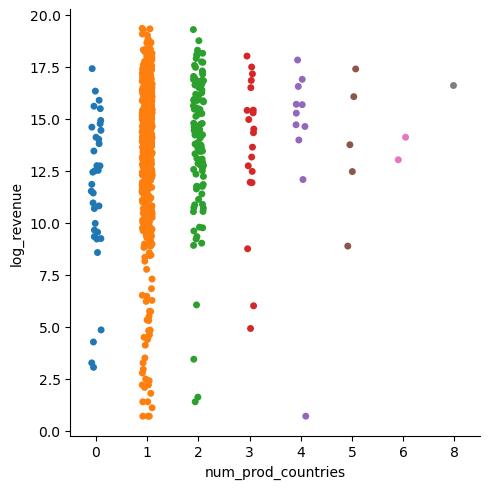

In [77]:
"""
可视化 num_prod_countries 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_prod_countries',y='log_revenue',data=train_data)

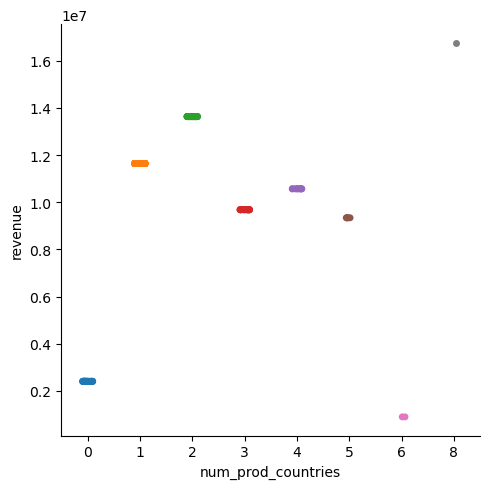

In [78]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,9):
    
    data =  train_data[train_data["num_prod_countries"] == i]
    mean.append(data['revenue'].mean())
    
data = train_data.copy(deep = True)
for i in range(0,9):
    data.loc[data["num_prod_countries"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_countries',y='revenue',data=data)

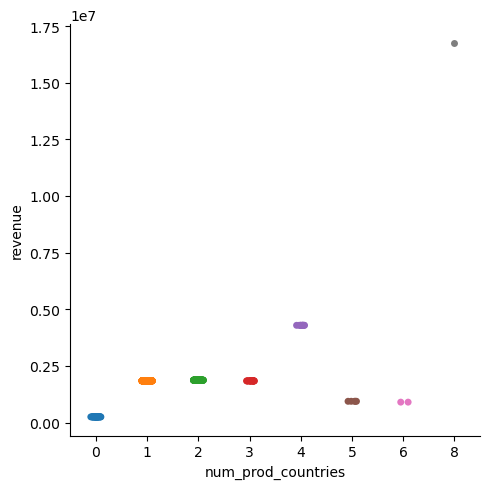

In [79]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,9):
    
    data =  train_data[train_data["num_prod_countries"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,9):
    data.loc[data["num_prod_countries"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_countries',y='revenue',data=data)

In [80]:
train_data.drop(['production_countries'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,production_companies,runtime,spoken_languages,status,tagline,Keywords,...,log_budget,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,NaN,...,0.00,15.18,0.76,0,2009,3,2,0,0,1
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",...,0.00,14.77,1.08,0,2004,3,1,1,0,0


**通过可视化可以看出，大部分电影由1或2个国家出品。当出品国家数在1~5个之间时往往票房收入不错** 

**(10) production_companies**  

In [81]:
train_data['production_companies'].isnull().sum()

94

In [82]:
count=[]
for i in train_data['production_companies']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_prod_companies'] = count
train_data.head(2)

,id,budget,genres,popularity,production_companies,runtime,spoken_languages,status,tagline,Keywords,...,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,NaN,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,NaN,...,15.18,0.76,0,2009,3,2,0,0,1,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,NaN,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",...,14.77,1.08,0,2004,3,1,1,0,0,0


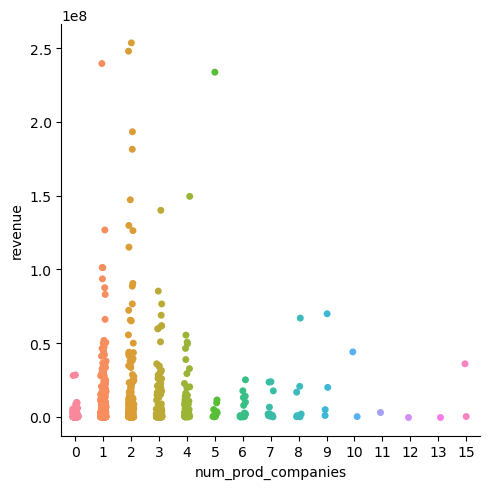

In [83]:
"""
可视化 num_prod_companies 与 revenue 之间的散点图
"""
sns.catplot(x='num_prod_companies',y='revenue',data=train_data)

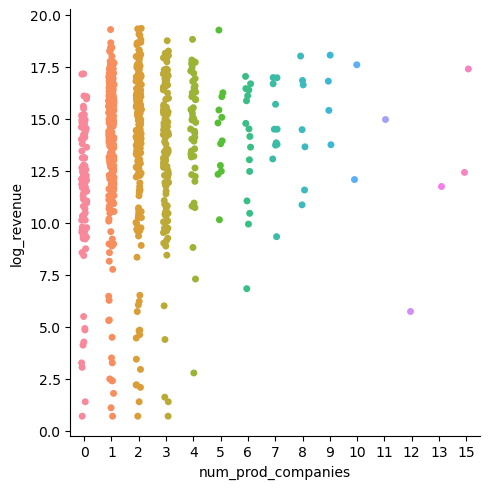

In [84]:
"""
可视化 num_prod_companies 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_prod_companies',y='log_revenue',data=train_data)

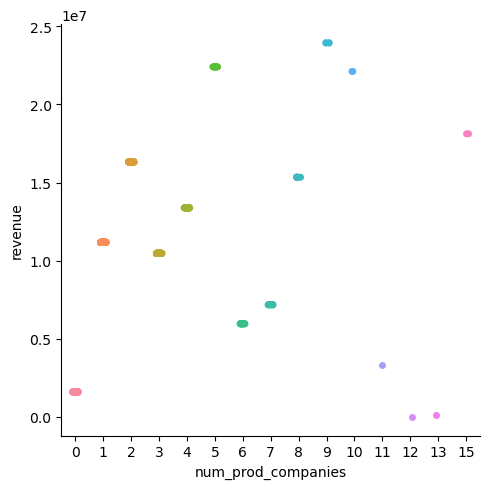

In [85]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_prod_companies"] == i]
    mean.append(data['revenue'].mean())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_prod_companies"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_companies',y='revenue',data=data)

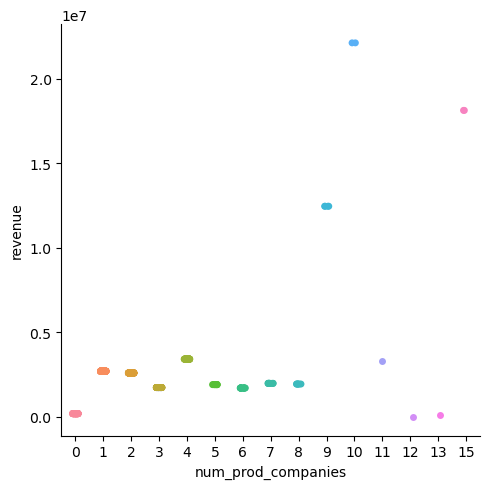

In [86]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_prod_companies"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_prod_companies"] == i,'revenue'] = mean[i]
sns.catplot(x='num_prod_companies',y='revenue',data=data)

In [87]:
train_data.drop(['production_companies'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,spoken_languages,status,tagline,Keywords,cast,...,log_revenue,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",...,15.18,0.76,0,2009,3,2,0,0,1,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...",...,14.77,1.08,0,2004,3,1,1,0,0,0


**(11) spoken_languages**  

In [88]:
train_data['spoken_languages'].isnull().sum()

14

In [89]:
count=[]
for i in train_data['spoken_languages']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_spoken_languages'] = count
train_data.head(2)

,id,budget,genres,popularity,runtime,spoken_languages,status,tagline,Keywords,cast,...,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",...,0.76,0,2009,3,2,0,0,1,0,1
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...",...,1.08,0,2004,3,1,1,0,0,0,2


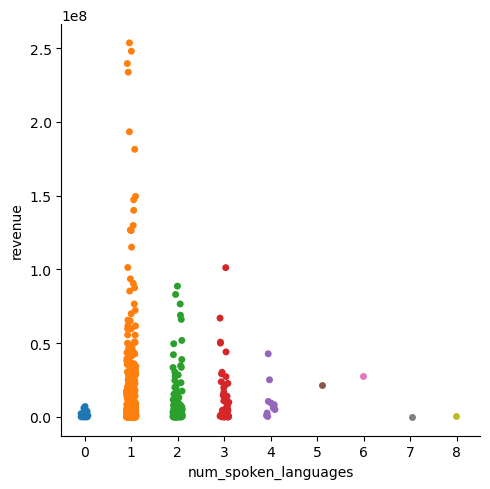

In [90]:
"""
可视化 num_spoken_languages 与 revenue 之间的散点图
"""
sns.catplot(x='num_spoken_languages',y='revenue',data=train_data)

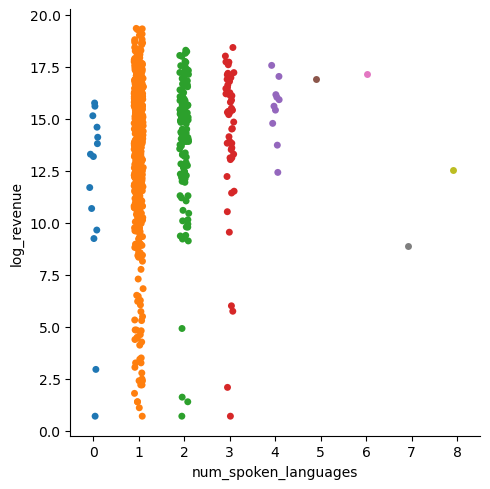

In [91]:
"""
可视化 num_spoken_languages 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_spoken_languages',y='log_revenue',data=train_data)

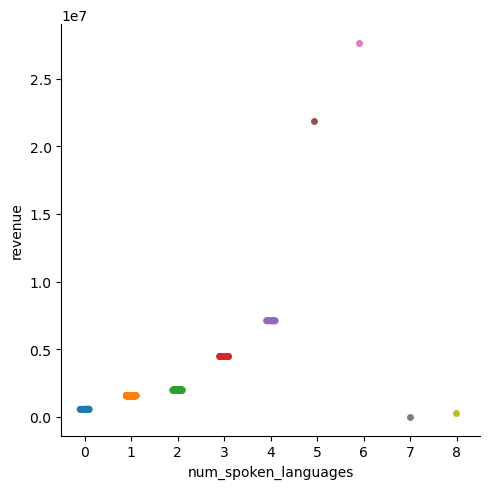

In [92]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_spoken_languages"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_spoken_languages"] == i,'revenue'] = mean[i]
sns.catplot(x='num_spoken_languages',y='revenue',data=data)

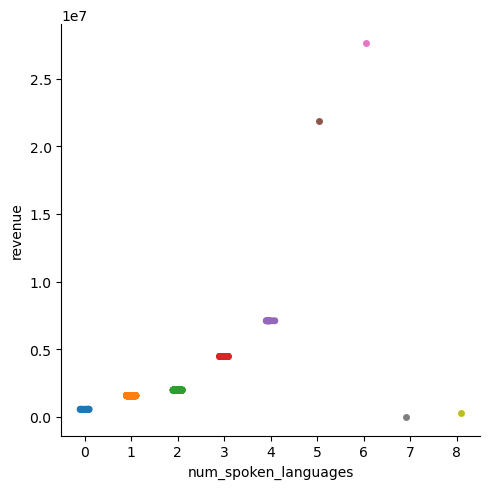

In [93]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,18):
    
    data =  train_data[train_data["num_spoken_languages"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,18):
    data.loc[data["num_spoken_languages"] == i,'revenue'] = mean[i]
sns.catplot(x='num_spoken_languages',y='revenue',data=data)

In [94]:
train_data.drop(['spoken_languages'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,status,tagline,Keywords,cast,crew,...,log_popularity,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,0.76,0,2009,3,2,0,0,1,0,1
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",...,1.08,0,2004,3,1,1,0,0,0,2


**通过可视化可以看出，大部分电影有1-2个输出语言。当输出语言数在5-6个之间时往往票房收入不错** 

**(12) cast**  

In [95]:
train_data['cast'].isnull().sum()

1

In [96]:
count=[]
for i in train_data['cast']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_cast'] = count
train_data.head(2)

,id,budget,genres,popularity,runtime,status,tagline,Keywords,cast,crew,...,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,Released,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",...,0,2009,3,2,0,0,1,0,1,4
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",...,0,2004,3,1,1,0,0,0,2,4


In [97]:
train_data['num_cast'].unique().max()

105

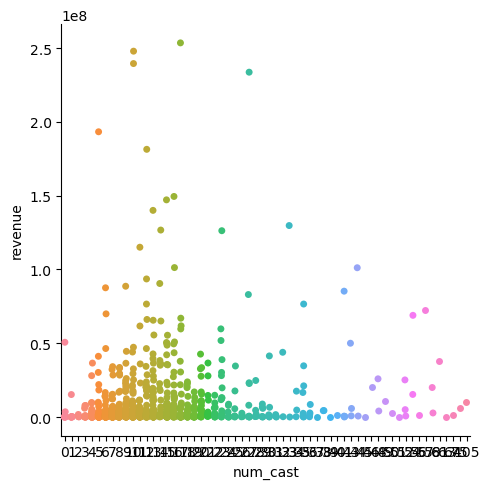

In [98]:
"""
可视化 num_cast 与 revenue 之间的散点图
"""
sns.catplot(x='num_cast',y='revenue',data=train_data)

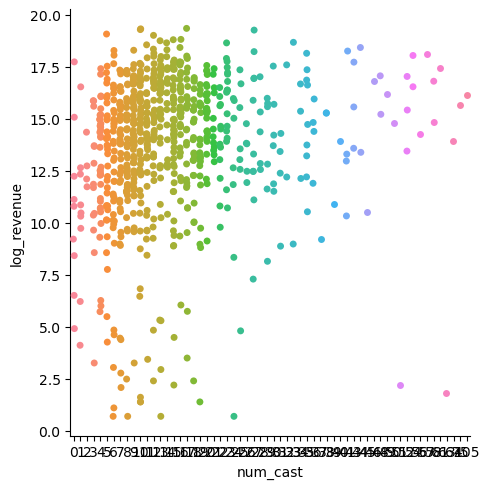

In [99]:
"""
可视化 num_cast 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_cast',y='log_revenue',data=train_data)

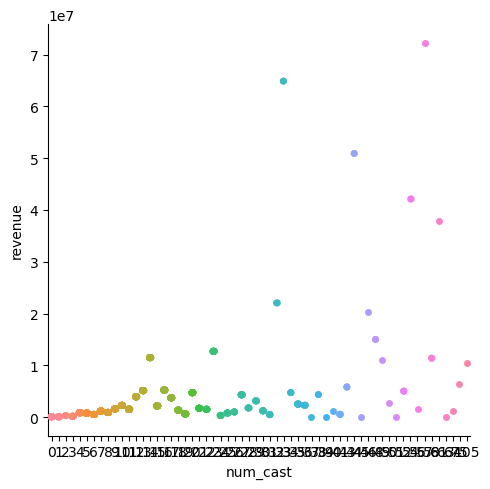

In [100]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,157):
    
    data =  train_data[train_data["num_cast"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,157):
    data.loc[data["num_cast"] == i,'revenue'] = mean[i]
sns.catplot(x='num_cast',y='revenue',data=data)

In [101]:
train_data.drop(['cast'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,status,tagline,Keywords,crew,revenue,...,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,Released,NaN,NaN,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,0,2009,3,2,0,0,1,0,1,4
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,...,0,2004,3,1,1,0,0,0,2,4


**通过可视化可以看出，大部分电影演员数目在50以下。总体来看，演员数目多的电影票房收入一般较高。但没有明显的线性关系。** 

**(13) crew**  

In [102]:
train_data['crew'].isnull().sum()

3

In [103]:
count=[]
for i in train_data['crew']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_crew'] = count
train_data.head(2)

,id,budget,genres,popularity,runtime,status,tagline,Keywords,crew,revenue,...,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,Released,NaN,NaN,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,...,2009,3,2,0,0,1,0,1,4,2
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,...,2004,3,1,1,0,0,0,2,4,1


In [104]:
train_data['num_crew'].unique().max()

137

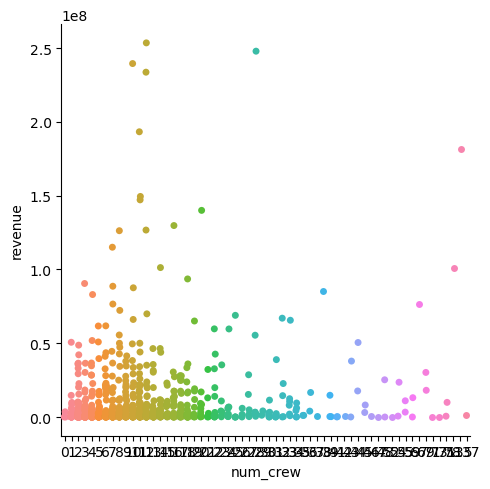

In [105]:
"""
可视化 num_crew 与 revenue 之间的散点图
"""
sns.catplot(x='num_crew',y='revenue',data=train_data)

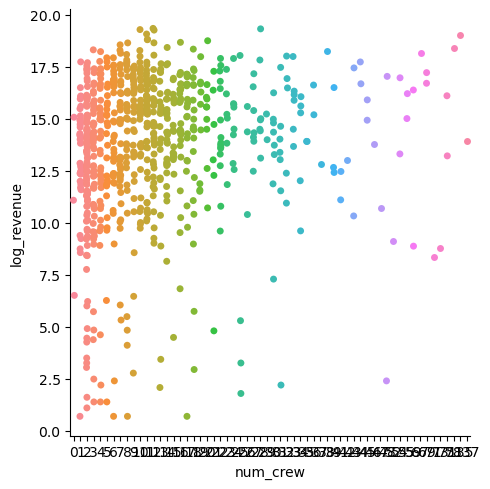

In [106]:
"""
可视化 num_crew 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_crew',y='log_revenue',data=train_data)

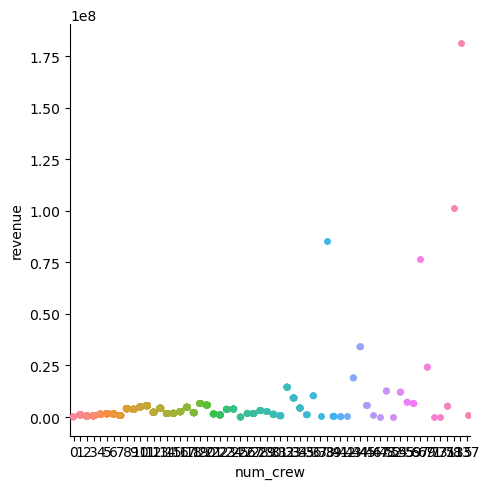

In [107]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,195):
    
    data =  train_data[train_data["num_crew"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,195):
    data.loc[data["num_crew"] == i,'revenue'] = mean[i]
sns.catplot(x='num_crew',y='revenue',data=data)

In [108]:
train_data.drop(['crew'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,status,tagline,Keywords,revenue,log_budget,...,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,Released,NaN,NaN,3923970,0.00,...,2009,3,2,0,0,1,0,1,4,2
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Released,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",2586511,0.00,...,2004,3,1,1,0,0,0,2,4,1


**总体来看，剧组人数多的电影票房收入一般较高。但没有明显的线性关系。** 

**(14) status**  

In [109]:
train_data['status'].isnull().sum()

0

In [110]:
train_data['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [111]:
# 查看状态为 'Rumored' 的电影数
data = train_data[train_data['status']=='Rumored']
data['status'].count()

4

**该属性特殊值极少，对分析无用。删除该属性**  

In [112]:
train_data.drop(['status'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,tagline,Keywords,revenue,log_budget,log_revenue,...,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,NaN,NaN,3923970,0.00,15.18,...,2009,3,2,0,0,1,0,1,4,2
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",2586511,0.00,14.77,...,2004,3,1,1,0,0,0,2,4,1


**(15) tagline**  

In [113]:
train_data['tagline'].isnull().sum()

285

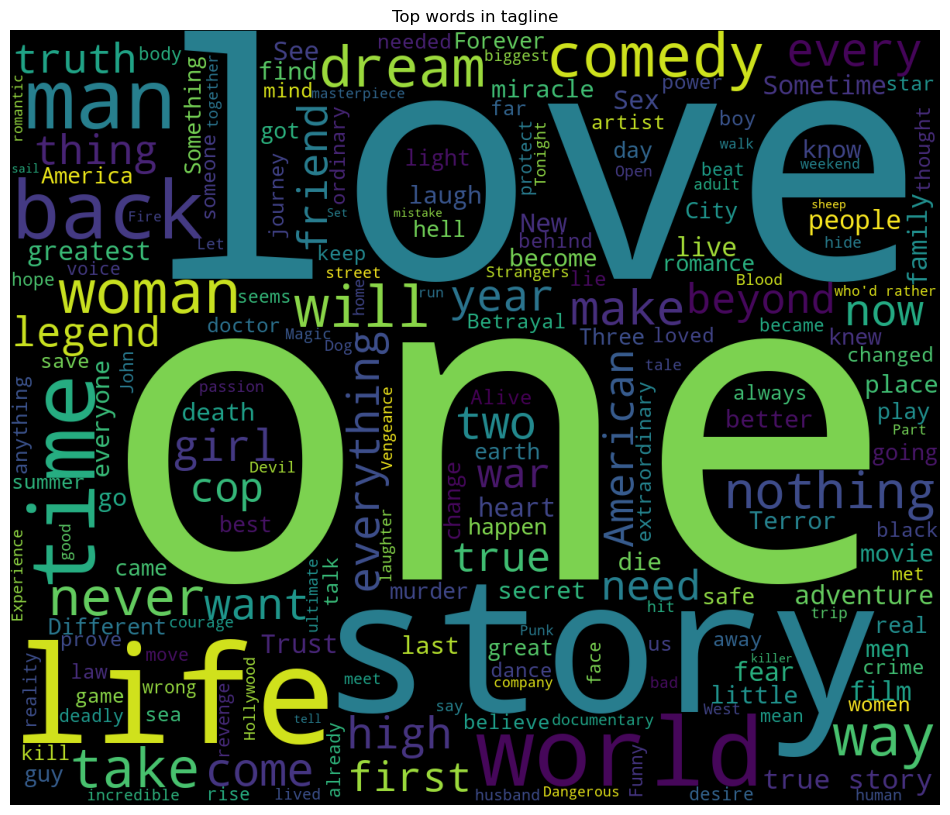

In [114]:
plt.figure(figsize = (12, 12))
text = ' '.join(train_data['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

In [115]:
"""
构建二值属性
"""
train_data['has_tagline'] = 0
train_data.loc[train_data['tagline'].isnull() == False, 'has_tagline'] = 1
train_data.head(2)

,id,budget,genres,popularity,runtime,tagline,Keywords,revenue,log_budget,log_revenue,...,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,NaN,NaN,3923970,0.00,15.18,...,3,2,0,0,1,0,1,4,2,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,Different channels. Different truths.,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",2586511,0.00,14.77,...,3,1,1,0,0,0,2,4,1,1


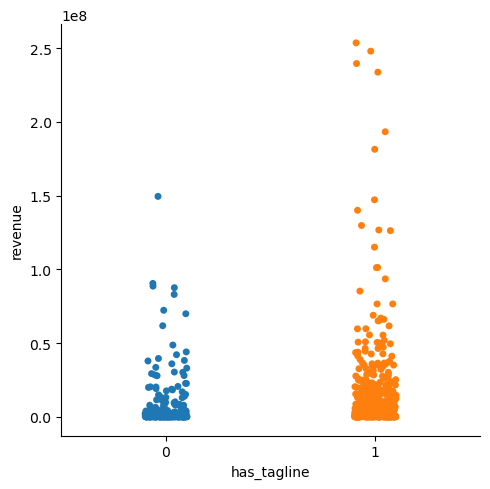

In [116]:
"""
可视化 has_tagline 与 revenue 之间的散点图
"""
sns.catplot(x='has_tagline',y='revenue',data=train_data)

In [117]:
has_tagline = train_data[train_data['has_tagline'] == 1]
has_tagline['revenue'].describe()

count         520.00
mean     14033571.07
std      30926452.77
min             1.00
25%        372641.25
50%       3217634.00
75%      14415828.00
max     253625427.00
Name: revenue, dtype: float64

In [118]:
no_tagline = train_data[train_data['has_tagline'] == 0]
no_tagline['revenue'].describe()

count         285.00
mean      6607455.29
std      16880608.28
min             1.00
25%         73000.00
50%        609524.00
75%       3832228.00
max     149521495.00
Name: revenue, dtype: float64

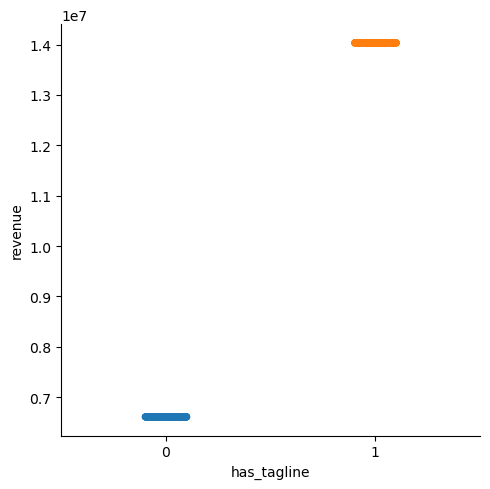

In [119]:
"""
可视化票房收入均值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_tagline"] == i]
    mean.append(data['revenue'].mean())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_tagline"] == i,'revenue'] = mean[i]
sns.catplot(x='has_tagline',y='revenue',data=data)

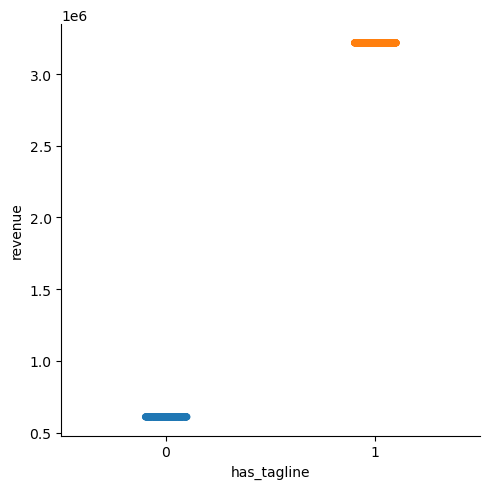

In [120]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,2):
    data =  train_data[train_data["has_tagline"] == i]
    mean.append(data['revenue'].median())

    
data = train_data.copy(deep = True)
for i in range(0,2):
    data.loc[data["has_tagline"] == i,'revenue'] = mean[i]
sns.catplot(x='has_tagline',y='revenue',data=data)

In [121]:
#tagline作为无效属性，删除该属性
train_data.drop(['tagline'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,Keywords,revenue,log_budget,log_revenue,log_popularity,...,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,NaN,3923970,0.00,15.18,0.76,...,3,2,0,0,1,0,1,4,2,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",2586511,0.00,14.77,1.08,...,3,1,1,0,0,0,2,4,1,1


**从散点图和数据特征来看，有标语的电影票房一般要高于无标语的电影**  

**(16) Keywords**  

In [122]:
train_data['Keywords'].isnull().sum()

135

In [123]:
Keywords = []
repeated_revenues = []
train_data['keywords'] = ""
for i in range(len(train_data)):
    if train_data['Keywords'][i] == train_data['Keywords'][i]:
        for Keyword in eval(train_data['Keywords'][i]):
            if train_data['keywords'][i] == "":
                train_data['keywords'][i] = Keyword['name']
            else :          
                train_data['keywords'][i] = train_data['keywords'][i] + "，" + Keyword['name']
train_data['keywords'].head()

C:\Users\26947\AppData\Local\Temp\ipykernel_3076\2348324258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['keywords'][i] = Keyword['name']
C:\Users\26947\AppData\Local\Temp\ipykernel_3076\2348324258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['keywords'][i] = train_data['keywords'][i] + "，" + Keyword['name']


0                                                     
1    journalism，translation，television，manipulation...
2              island，pirate gang，puppet，treasure hunt
3           nerd，vacation，farce，jock，frame up，defector
4                                      skinhead，serbia
Name: keywords, dtype: object

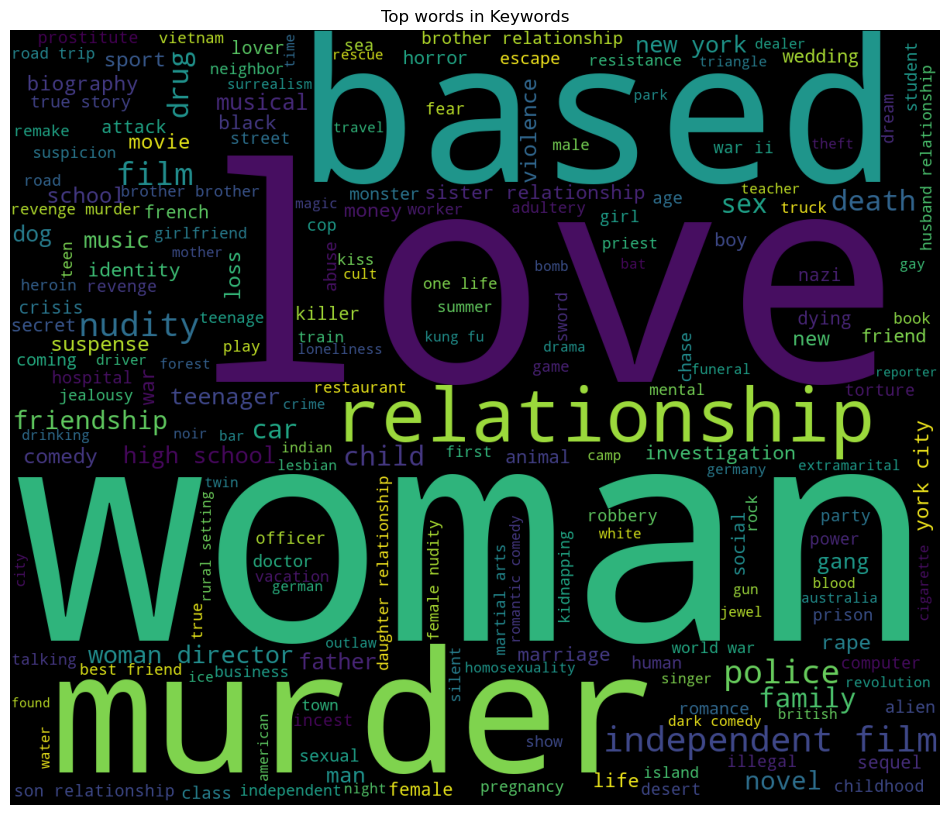

In [124]:
plt.figure(figsize = (12, 12))
text = ''.join(train_data['keywords'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in Keywords')
plt.axis("off")
plt.show()

In [125]:
count=[]
for i in train_data['Keywords']:
    if(not(pd.isnull(i))):
        
        count.append(len(eval(i)))
        
    else:
        count.append(0)
train_data['num_keywords'] = count
train_data.head(2)

,id,budget,genres,popularity,runtime,Keywords,revenue,log_budget,log_revenue,log_popularity,...,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline,keywords,num_keywords
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,NaN,3923970,0.00,15.18,0.76,...,0,0,1,0,1,4,2,0,,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,"[{'id': 917, 'name': 'journalism'}, {'id': 163...",2586511,0.00,14.77,1.08,...,1,0,0,0,2,4,1,1,journalism，translation，television，manipulation...,7


In [126]:
train_data['num_keywords'].unique().max()

149

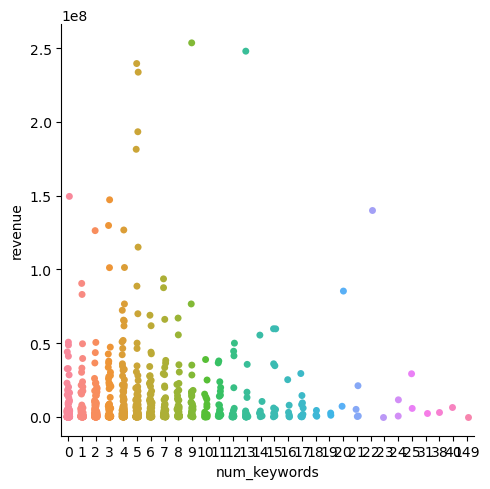

In [127]:
"""
可视化 num_keywords 与 revenue 之间的散点图
"""
sns.catplot(x='num_keywords',y='revenue',data=train_data)

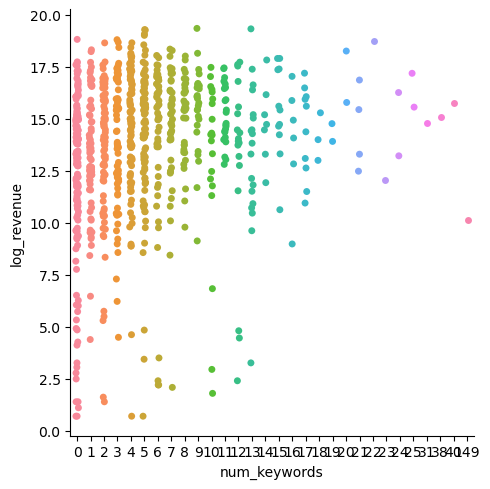

In [128]:
"""
可视化 num_keywords 与 log_revenue 之间的散点图
"""
sns.catplot(x='num_keywords',y='log_revenue',data=train_data)

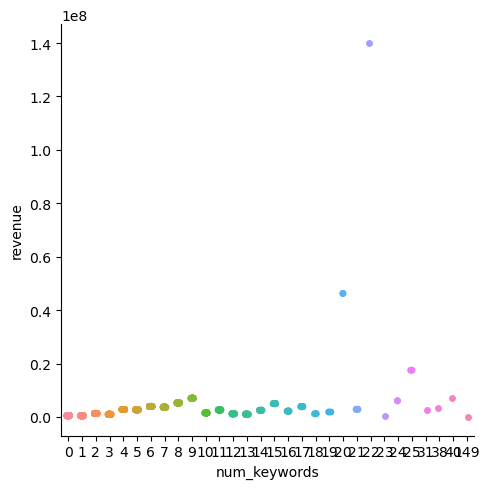

In [129]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,150):
    
    data =  train_data[train_data["num_keywords"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,150):
    data.loc[data["num_keywords"] == i,'revenue'] = mean[i]
sns.catplot(x='num_keywords',y='revenue',data=data)

In [130]:
#Keywords作为无效属性，删除该属性
train_data.drop(['Keywords'], axis=1, inplace=True)
train_data.drop(['keywords'], axis=1, inplace=True)
train_data.head(2)

,id,budget,genres,popularity,runtime,revenue,log_budget,log_revenue,log_popularity,has_homepage,...,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline,num_keywords
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,3923970,0.00,15.18,0.76,0,...,2,0,0,1,0,1,4,2,0,0
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,2586511,0.00,14.77,1.08,0,...,1,1,0,0,0,2,4,1,1,7


**总体来看，Keywords多的电影票房收入一般较高。** 

**(17) genres**  

In [131]:
train_data['genres'].isnull().sum()

3

In [132]:
genres = []
repeated_revenues = []
for i in range(len(train_data)):
    if train_data['genres'][i] == train_data['genres'][i]:
        movie_genre = [genre['name'] for genre in eval(train_data['genres'][i])]
        genres.extend(movie_genre)
        repeated_revenues.extend([train_data['revenue'][i]]*len(movie_genre))

genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

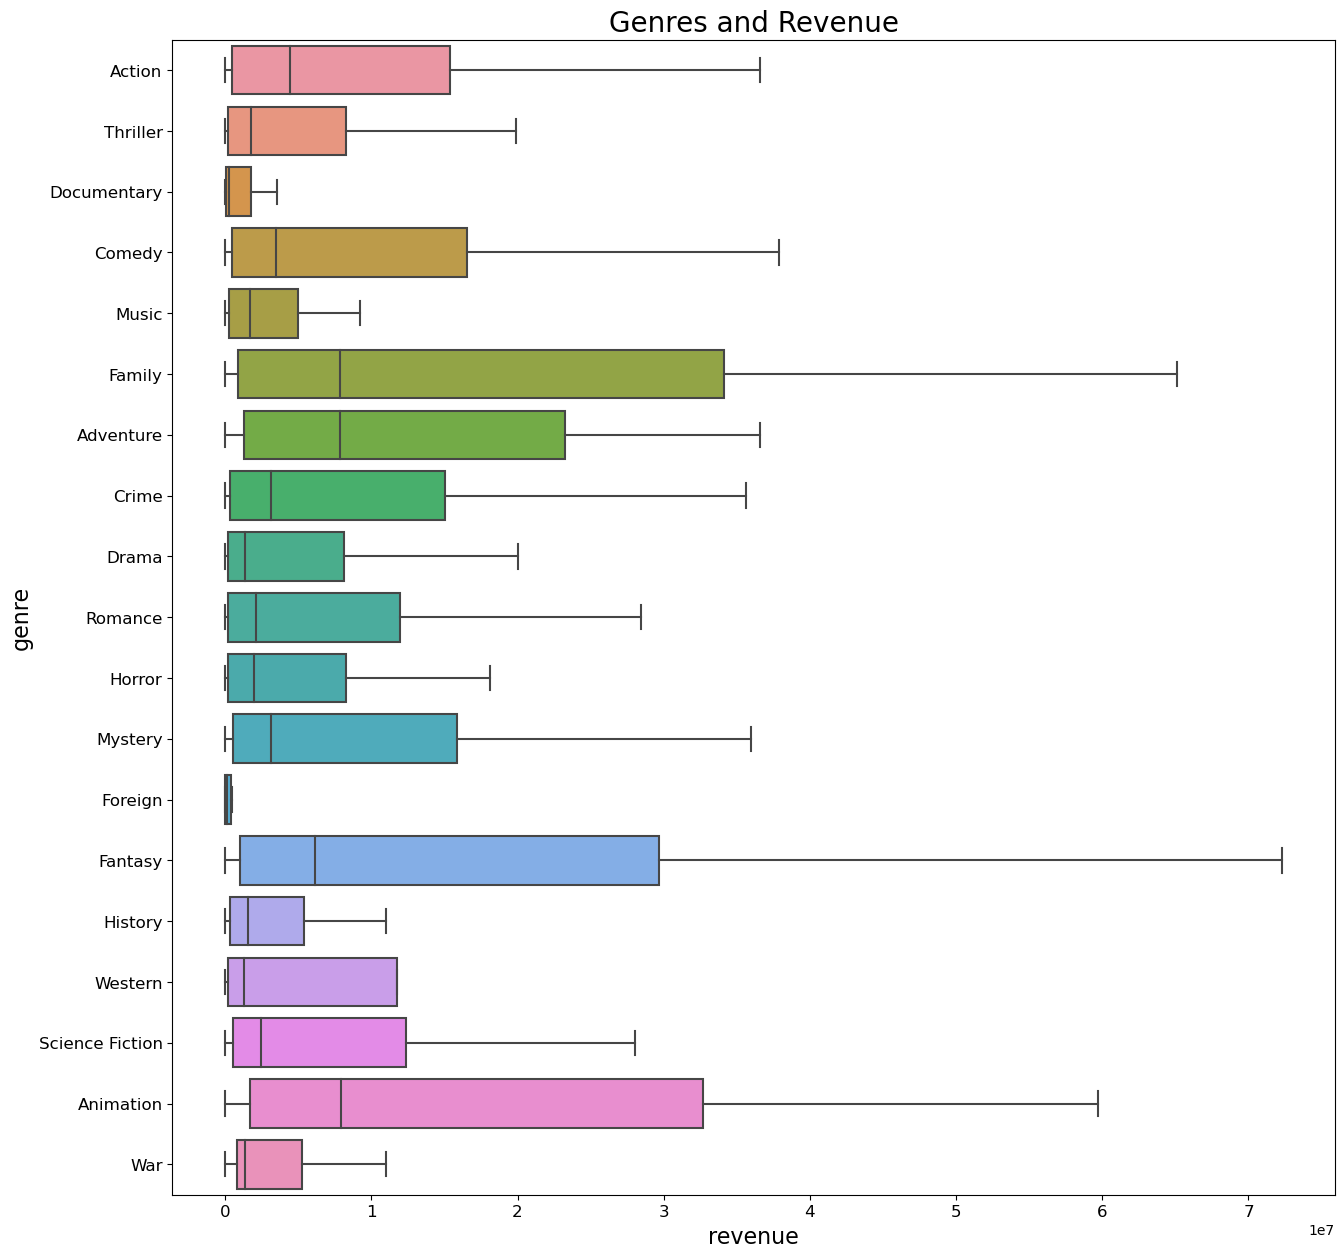

In [133]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()

**从图中可以看出，Family，Animation，Fantasy，Adventure，Action 和 Comedy 类型的电影票房一般比较高**  

In [134]:
"""
尝试将 genres 属性转换为 is_popular_genres 属性
"""

train_data['is_popular_genres'] = 0
for i in range(len(train_data)):
    if train_data['genres'][i] == train_data['genres'][i]:
        for genre in eval(train_data['genres'][i]):
            if genre['name'] == "Family":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Animation":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Fantasy":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Adventure":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Action":
                train_data['is_popular_genres'][i] += 1
            elif genre['name'] == "Comedy":
                train_data['is_popular_genres'][i] += 1
            else:
                continue
train_data.head(2)

C:\Users\26947\AppData\Local\Temp\ipykernel_3076\1286600378.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popular_genres'][i] += 1
C:\Users\26947\AppData\Local\Temp\ipykernel_3076\1286600378.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popular_genres'][i] += 1
C:\Users\26947\AppData\Local\Temp\ipykernel_3076\1286600378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['is_popul

,id,budget,genres,popularity,runtime,revenue,log_budget,log_revenue,log_popularity,has_homepage,...,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline,num_keywords,is_popular_genres
0,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.15,118.00,3923970,0.00,15.18,0.76,0,...,0,0,1,0,1,4,2,0,0,1
1,8,0,"[{'id': 99, 'name': 'Documentary'}]",1.95,84.00,2586511,0.00,14.77,1.08,0,...,1,0,0,0,2,4,1,1,7,0


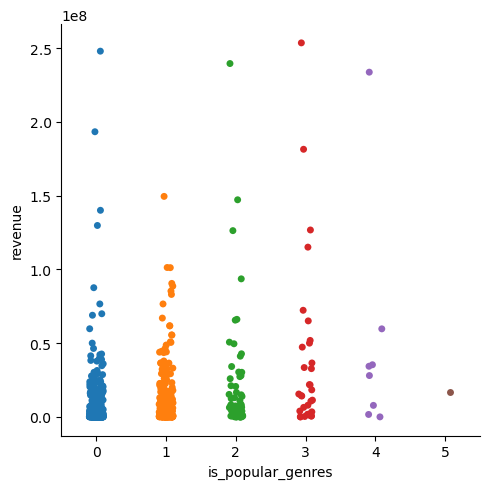

In [135]:
"""
可视化 is_popular_genres 与 revenue 之间的散点图
"""
sns.catplot(x='is_popular_genres',y='revenue',data=train_data)

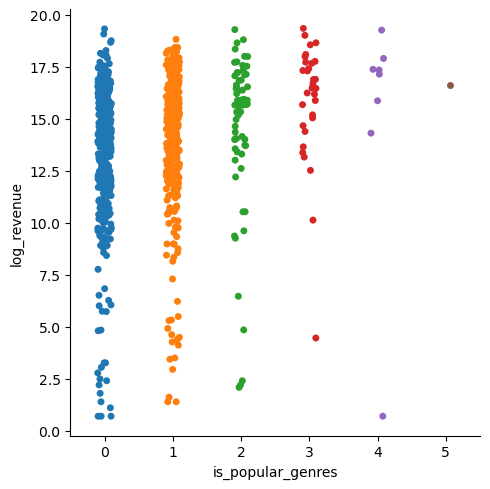

In [136]:
"""
可视化 is_popular_genres 与 log_revenue 之间的散点图
"""
sns.catplot(x='is_popular_genres',y='log_revenue',data=train_data)

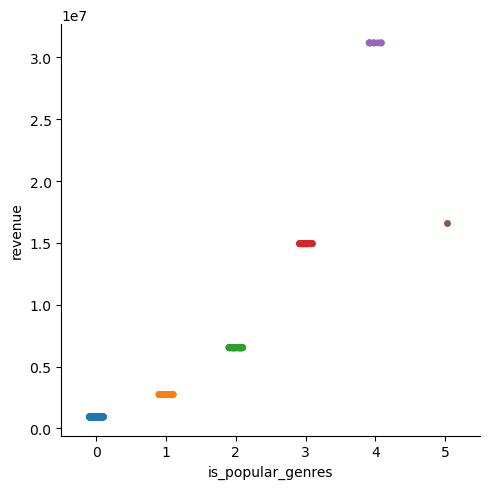

In [137]:
"""
可视化票房收入中值
"""
mean = []
for i in range(0,150):
    
    data =  train_data[train_data["is_popular_genres"] == i]
    mean.append(data['revenue'].median())
    
data = train_data.copy(deep = True)
for i in range(0,150):
    data.loc[data["is_popular_genres"] == i,'revenue'] = mean[i]
sns.catplot(x='is_popular_genres',y='revenue',data=data)

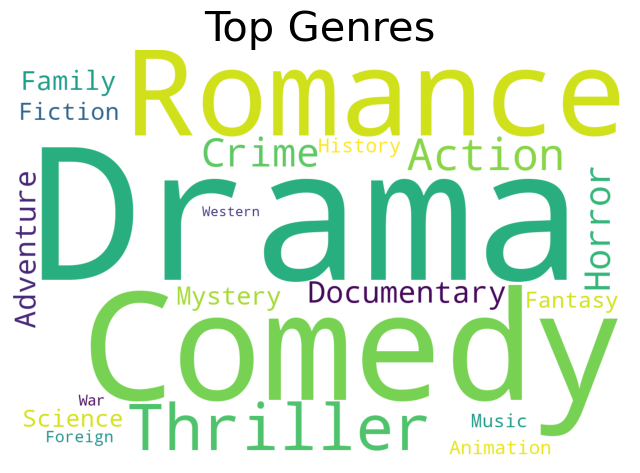

In [138]:
plt.figure(figsize = (8, 6))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=30)
plt.axis("off")
plt.show()

In [139]:
#Keywords作为无效属性，删除该属性
train_data.drop(['genres'], axis=1, inplace=True)
train_data.head(2)

,id,budget,popularity,runtime,revenue,log_budget,log_revenue,log_popularity,has_homepage,release_year,...,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline,num_keywords,is_popular_genres
0,5,0,1.15,118.00,3923970,0.00,15.18,0.76,0,2009,...,0,0,1,0,1,4,2,0,0,1
1,8,0,1.95,84.00,2586511,0.00,14.77,1.08,0,2004,...,1,0,0,0,2,4,1,1,7,0


**结合可视化可以看出，电影同时符合多个流行流派时，票房收入更高一些**  

## 数据相关性分析

In [140]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    805 non-null    int64  
 1   budget                805 non-null    int64  
 2   popularity            805 non-null    float64
 3   runtime               805 non-null    float64
 4   revenue               805 non-null    int64  
 5   log_budget            805 non-null    float64
 6   log_revenue           805 non-null    float64
 7   log_popularity        805 non-null    float64
 8   has_homepage          805 non-null    int64  
 9   release_year          805 non-null    int64  
 10  release_day           805 non-null    int32  
 11  release_month         805 non-null    int32  
 12  is_en                 805 non-null    int64  
 13  collection            805 non-null    int64  
 14  num_prod_countries    805 non-null    int64  
 15  num_prod_companies    8

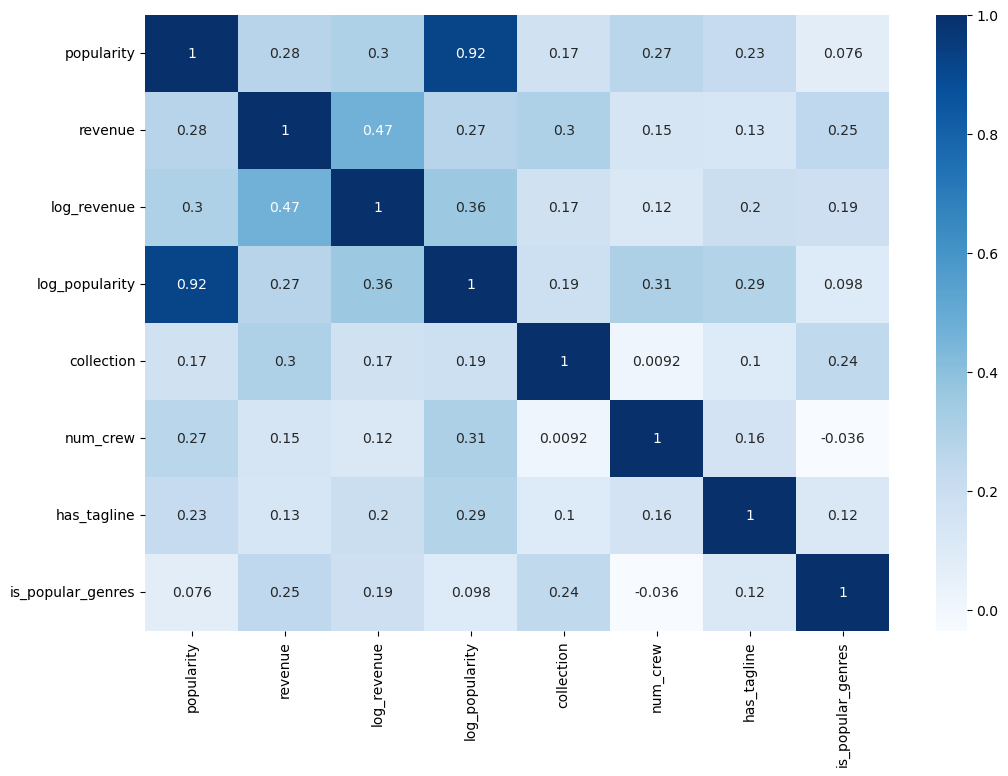

In [141]:
corr =train_data.corr()
top_feature = corr.index[abs(corr['revenue'])>0.1]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [142]:
#删除 log_budget， log_revenue， log_popularity等冗余属性，再次计算相似度
train_data.drop(['log_budget'], axis=1, inplace=True)
train_data.drop(['log_revenue'], axis=1, inplace=True)
train_data.drop(['log_popularity'], axis=1, inplace=True)
train_data.head(2)

,id,budget,popularity,runtime,revenue,has_homepage,release_year,release_day,release_month,is_en,collection,num_prod_countries,num_prod_companies,num_spoken_languages,num_cast,num_crew,has_tagline,num_keywords,is_popular_genres
0,5,0,1.15,118.00,3923970,0,2009,3,2,0,0,1,0,1,4,2,0,0,1
1,8,0,1.95,84.00,2586511,0,2004,3,1,1,0,0,0,2,4,1,1,7,0


In [143]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    805 non-null    int64  
 1   budget                805 non-null    int64  
 2   popularity            805 non-null    float64
 3   runtime               805 non-null    float64
 4   revenue               805 non-null    int64  
 5   has_homepage          805 non-null    int64  
 6   release_year          805 non-null    int64  
 7   release_day           805 non-null    int32  
 8   release_month         805 non-null    int32  
 9   is_en                 805 non-null    int64  
 10  collection            805 non-null    int64  
 11  num_prod_countries    805 non-null    int64  
 12  num_prod_companies    805 non-null    int64  
 13  num_spoken_languages  805 non-null    int64  
 14  num_cast              805 non-null    int64  
 15  num_crew              8

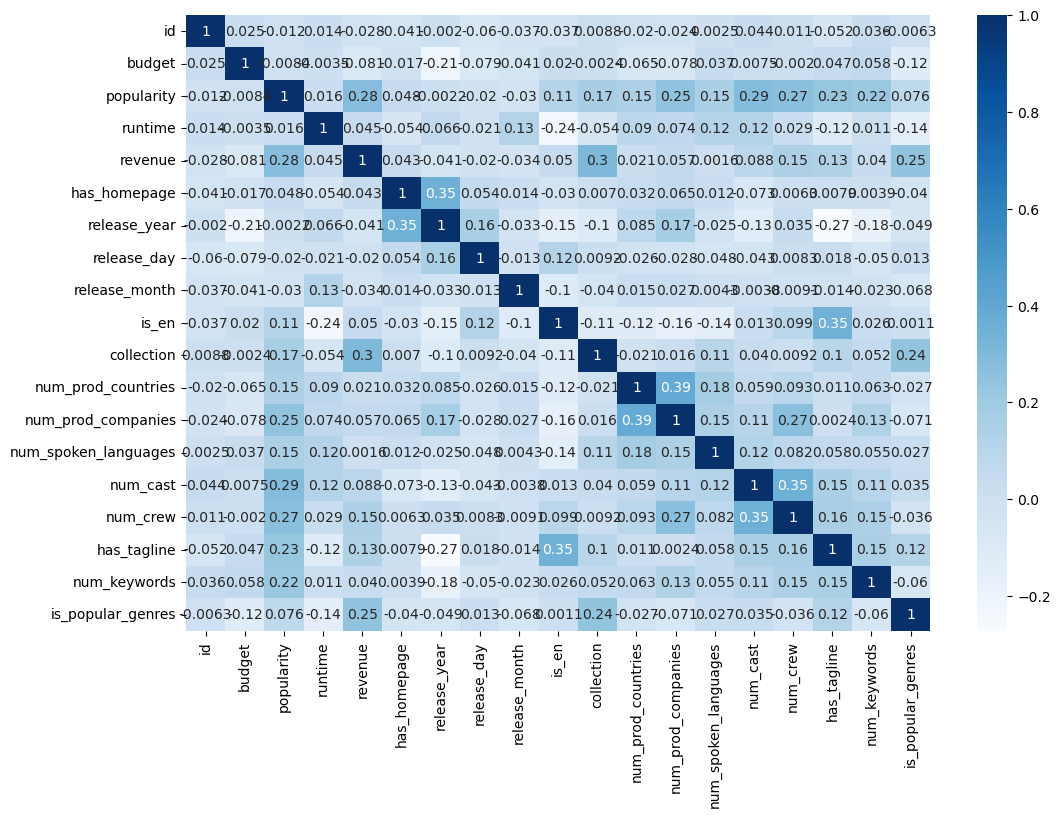

In [144]:
corr =train_data.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr,cmap='Blues', annot=True)
plt.show()

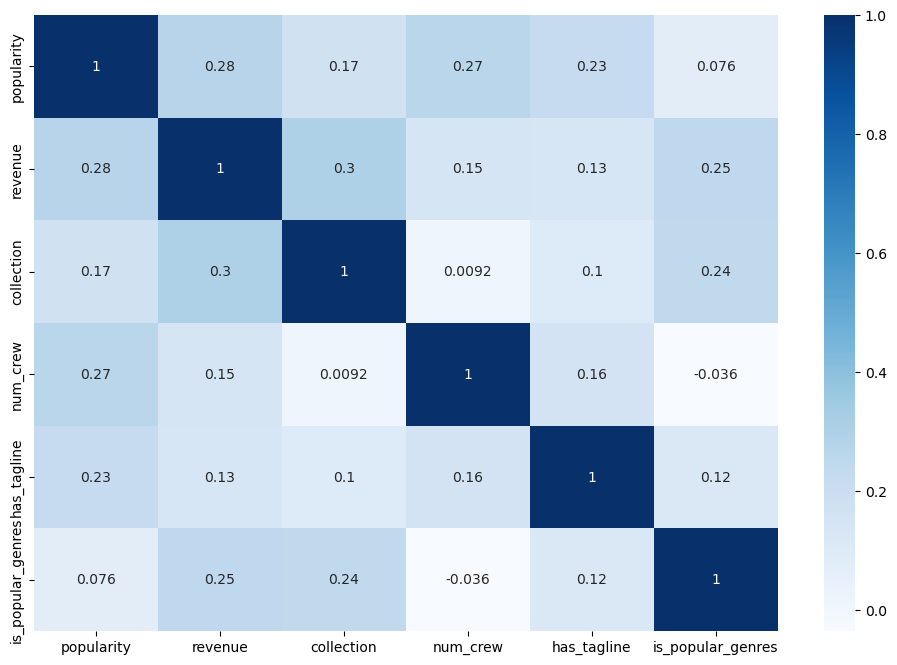

In [145]:
corr =train_data.corr()
top_feature = corr.index[abs(corr['revenue'])>0.1]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = train_data[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()